##### Libraries and GPU

In [1]:
                                    ########### VISUALIZATION TOOLS ###########

%matplotlib inline
import matplotlib.pyplot as plt                  # basic plotting
import matplotlib.ticker as mtick                 # axis tick formatting
from matplotlib import colormaps as cm            # colormaps
import matplotlib.patches as mpatches             # patch shapes
from matplotlib.patches import Patch              # patch base class

import seaborn as sns                             # statistical data visualization
import warnings                                   # warning control
warnings.filterwarnings("ignore", category=UserWarning)  # ignore seaborn UserWarnings

import plotly.express as px                       # interactive plots (express interface)
import plotly.graph_objects as go                  # interactive plots (graph objects)

import folium                                    # interactive maps
from folium import plugins                        # folium plugins
from folium import Choropleth                      # choropleth maps

from IPython.display import display, IFrame, HTML  # display rich content in notebooks
from IPython import display as ipythondisplay

from tqdm.notebook import tqdm                    # progress bars for notebook loops

import wordcloud                                 # word cloud visualization
from wordcloud import WordCloud, STOPWORDS        # word cloud generator and stopwords

                                    ########### VECTORS AND MATRICES ###########

import numpy as np                               # numerical arrays and matrix operations
import pandas as pd                              # data manipulation and analysis

                                    ########### SCIPY ###########

from scipy import stats                           # statistical functions

                                    ########### SCIKIT-LEARN ###########

from sklearn.preprocessing import (
    StandardScaler,      # z-score normalization
    normalize,           # row-wise normalization
    PolynomialFeatures,  # polynomial regression features
    OneHotEncoder,       # one-hot encoding categorical features
    LabelEncoder,        # label encoding for target
    label_binarize       # multi-label one-hot encoding
)

from sklearn.linear_model import (
    LinearRegression,    # ordinary least squares regression
    Ridge,               # ridge regression (L2 regularization)
    Lasso,               # lasso regression (L1 regularization)
    LogisticRegression   # logistic regression for classification
)

from sklearn.tree import (
    DecisionTreeClassifier,  # classification trees
    DecisionTreeRegressor,   # regression trees
    plot_tree                # visualize decision trees
)

from sklearn.svm import (
    LinearSVC,  # linear support vector classifier
    SVC         # kernelized SVM classifier
)

from sklearn.neighbors import KNeighborsClassifier  # k-nearest neighbors

from sklearn.cluster import KMeans               # k-means clustering

from sklearn.ensemble import (
    RandomForestRegressor,    # ensemble regression method
    RandomForestClassifier    # ensemble classification method
)

from sklearn.metrics import (
    mean_squared_error,      # MSE regression metric
    r2_score,               # R-squared metric
    log_loss,               # cross-entropy loss
    mean_absolute_error,    # MAE metric
    root_mean_squared_error,# RMSE metric
    confusion_matrix,       # confusion matrix
    ConfusionMatrixDisplay, # plot confusion matrix
    accuracy_score,         # classification accuracy
    roc_auc_score,          # ROC AUC metric
    classification_report,  # detailed classification metrics report
    silhouette_score, silhouette_samples, davies_bouldin_score,  # clustering quality metrics
    explained_variance_score # explained variance regression metric
)

from sklearn.pipeline import Pipeline           # pipeline for chaining transforms and estimators

from sklearn.model_selection import (
    train_test_split,       # split data into train/test sets
    cross_val_score,        # k-fold cross-validation scores
    cross_val_predict,      # k-fold cross-validation predictions
    StratifiedKFold,        # stratified k-fold cross-validation
    GridSearchCV            # grid search hyperparameter tuning
)

from sklearn.multiclass import OneVsOneClassifier  # multiclass classification using binary classifiers

from sklearn.utils.class_weight import compute_sample_weight  # compute sample weights for imbalanced data

from sklearn.decomposition import PCA              # principal component analysis

from sklearn.compose import ColumnTransformer       # apply different transformations to columns

from sklearn.impute import SimpleImputer             # missing value imputation

#from umap.umap_ import UMAP                          # UMAP dimensionality reduction (commented out)

from sklearn.manifold import TSNE                     # t-SNE dimensionality reduction

from sklearn.datasets import (
    make_blobs,              # synthetic cluster dataset generator
    make_classification,     # synthetic classification dataset generator
    load_diabetes,           # diabetes dataset
    load_breast_cancer,      # breast cancer dataset
    load_iris,               # iris dataset
    fetch_california_housing # california housing dataset
)
diabetes = load_diabetes()
cancers = load_breast_cancer()
iris = load_iris()
cal_housing = fetch_california_housing()

                                    ########### ENSEMBLE METHODS ###########

from xgboost import XGBRegressor                   # extreme gradient boosting regressor

                                    ########### PYTORCH ###########

import torch                                        # core PyTorch
from torch import nn                               # neural network modules
from torch import optim                            # optimizers
import torch.nn.functional as functional           # functional interface for NN ops
from torch.utils.data import Dataset, DataLoader, random_split  # data utilities
from torchvision.utils import make_grid             # visualize image grids
import torchvision                                  # computer vision models and datasets
import torchvision.transforms as transforms         # image transforms pipeline
from torchvision import datasets                     # image datasets
from torch.utils.data import Subset                  # subset of datasets
import torchvision.models as models                  # pretrained models

import albumentations as albuments                   # advanced data augmentation

from torchsummary import summary                     # model summary

import timm                                         # PyTorch Image Models (SOTA model zoo)

                                    ########### IMAGES ###########

import os                                           # filesystem operations
from PIL import Image, ImageFile                     # image loading and processing

import copy                                # shallow copy
import operator                                     # functional tools for operators
import sys                                          # system-specific parameters and functions

import cv2                                          # OpenCV for image processing

                                    ########### SCRAPING ###########

import urllib                                        # URL handling
import requests                                     # HTTP requests
import io                                           # streams and bytes IO
from io import StringIO                             # string stream for IO

from bs4 import BeautifulSoup                        # HTML/XML parsing

import json                                         # JSON parsing
import xml.etree.ElementTree as ET                   # XML parsing

                                    ########### MISC ###########

import gymnasium                                    # reinforcement learning environments
from gymnasium.wrappers import RecordVideo          # video recording wrapper for gymnasium envs

import glob                                         # Unix style pathname pattern expansion
import base64                                       # base64 encoding/decoding

import random                                       # random number generators
import time                                         # time-related functions
import datetime                                     # date and time functions

import re                                           # regular expressions
import unicodedata                                  # Unicode character database

import shutil                                       # high-level file operations
from pathlib import Path                            # filesystem path manipulations

from collections import namedtuple, deque          # advanced data structures


In [2]:
def accelerator(where = "mps"):
    if where == "mps":
        device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
        print("Which device we are on: {}".format(device))
        return device
    if where == "cuda":
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print("Which device we are on: {}".format(device))
        return device
    if where == "cpu":
        device = torch.device("cpu")
        print("Which device we are on: {}".format(device))
        return device

def accelerator():
    if torch.cuda.is_available():
        device = torch.device("cuda")
    elif torch.backends.mps.is_available():
        device = torch.device("mps")
    else:
        device = torch.device("cpu")
    print(f"Which device we are on: {device}")
    return device


device = accelerator()

Which device we are on: mps


In [3]:
if device.type == 'cuda':
  from google.colab import drive
  drive.mount('/content/drive', force_remount = True)


# Download images

In [6]:
images_url = ["https://www.learnopencv.com/wp-content/uploads/2021/01/horse-segmentation.jpeg",
            "https://scontent-mxp1-1.xx.fbcdn.net/v/t39.30808-6/504518574_2151407118626180_7457299521297047557_n.jpg?_nc_cat=103&ccb=1-7&_nc_sid=6ee11a&_nc_ohc=pCRb2mnHvcQQ7kNvwGZXAMP&_nc_oc=AdlwiLCDokSR1SO1ByUkGnjGWaeL7t8Bjq7xvUjXpTNCC96X1yQSY8QlfbJUUBpJmicRZzzsukTXjkQpq6qnZzJv&_nc_zt=23&_nc_ht=scontent-mxp1-1.xx&_nc_gid=LgWVnooqP8UMsIT_8tBG1Q&oh=00_AfWEsHSULr3FYquj80otuit4GmBkqdCchgVlOSUR2jYGEg&oe=68AA682D",
            "https://scontent-mxp2-1.xx.fbcdn.net/v/t39.30808-6/475239607_2044317006001859_8049128489945110710_n.jpg?_nc_cat=105&ccb=1-7&_nc_sid=a5f93a&_nc_ohc=isvdUWuJsKwQ7kNvwEh6eCP&_nc_oc=AdkE5Kj69hyHpH4DqgTtBlTZYezoChfTPjgS-0zgpVaTFQ3aBXfehDaILeDSDBBPTmOGOqe23eSWIyS258ny2onn&_nc_zt=23&_nc_ht=scontent-mxp2-1.xx&_nc_gid=SvNiPQ7Q1yrtpOi_hv4MkA&oh=00_AfVsChxy0RVPhfV7j-H1YPrAkne4kz8C_GHYw8CIMZi4jQ&oe=68AA716D",
            "https://scontent-mxp2-1.xx.fbcdn.net/v/t1.6435-9/185095541_1166775690422666_4720154358181744095_n.jpg?_nc_cat=105&ccb=1-7&_nc_sid=a5f93a&_nc_ohc=dlNxF4eLQXYQ7kNvwEp_Api&_nc_oc=Adkmzj1Ji_NDRkaTYK0BGP29VlJhRy-uFDDly-khtJ3wxNEarH9QK-MQcuF__Pmumr1ZTzmgERDSdt5kXTm6wN5r&_nc_zt=23&_nc_ht=scontent-mxp2-1.xx&_nc_gid=K1_eXmQpok1hbQ2TqaZs4Q&oh=00_AfWMQIcDCGCJOL4RM8_owc4kZMCXGv-l12zdYJIBLvIprQ&oe=68CC282B"]
download_directory = "Images"

colab_path = "/content/drive/Othercomputers/Il mio MacBook Pro/My notebooks/My tutorials/"
if device.type == 'cuda':
    download_directory = colab_path + download_directory

In [7]:
# import subprocess

# shutil.rmtree(download_directory, ignore_errors = True)
# os.makedirs(download_directory, exist_ok = True)

# def download_file(url, save_name):
#     if not os.path.exists(save_name):
#         subprocess.run(['wget', url, '-O', save_name, '-q'])

# for i in range(len(images_url)):
#     download_file(
#         images_url[i],
#         save_name = os.path.join(download_directory, f"image{i}.jpg")
#     )

(1536, 1024)


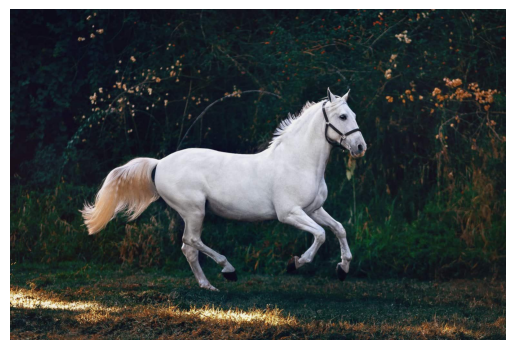

(1200, 1200)


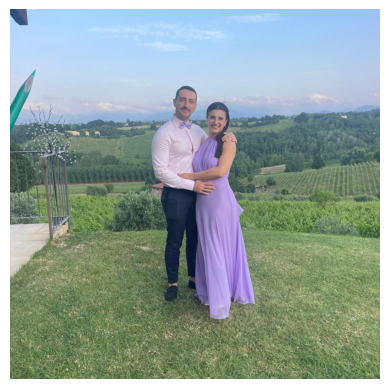

(854, 853)


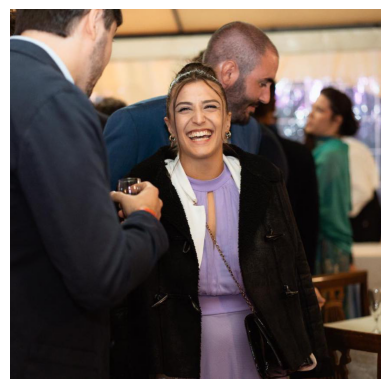

(2048, 2048)


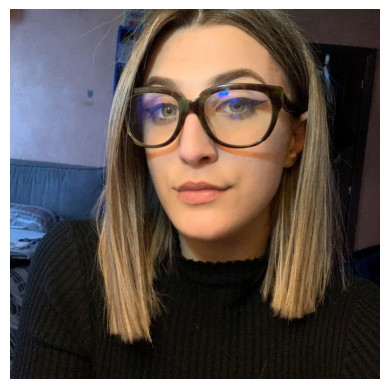

In [8]:
for i in range(len(images_url)):
    img = Image.open(os.path.join(download_directory, f"image{i}.jpg"))
    print(img.size)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    plt.close()

In [9]:
def is_not_truncated(file_path):
    try:
        with Image.open(file_path) as img:
            img.load()
            return True
    except OSError:
        return False

def image_checker(folder_path):
    corrupted = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                path = os.path.join(root, file)
                if not is_not_truncated(path):
                    corrupted.append(path)

    if corrupted:
        print("List of corrupted images:")
        for path in corrupted:
            print(path)
    else:
        print("✅✅✅✅ No corrupted images found ✅✅✅✅")

ImageFile.LOAD_TRUNCATED_IMAGES = False  # Raise error on truncated images
image_checker(download_directory)

✅✅✅✅ No corrupted images found ✅✅✅✅


# Semantic Segmentation

The torchvision segmentation models expect as input images in the format [batches, 3 channels, h, w] with the imagenet mean and std. The output is [No x Co x Ho x Wo] where,
- No -> is the batch size (same as Ni)
- Co -> is the number of classes that the dataset have!
- Ho -> the height of the image (which is the same as Hi in almost all cases)
- Wo -> the width of the image (which is the same as Wi in almost all cases)

The torchvision models outputs an OrderedDict and not a torch.Tensor
Moreover in .eval() mode it just has one key out and thus to get the output we need to get the value stored in that key.

The out key of this OrderedDict is the key that holds the output.
So, this out key's value has the shape of [No x Co x Ho x Wo].

In [10]:
if device.type != "cuda":
    device = torch.device("cpu")


dlab_model = models.segmentation.deeplabv3_resnet101(
    weights='COCO_WITH_VOC_LABELS_V1'
#     pretrained=True
).to(device)

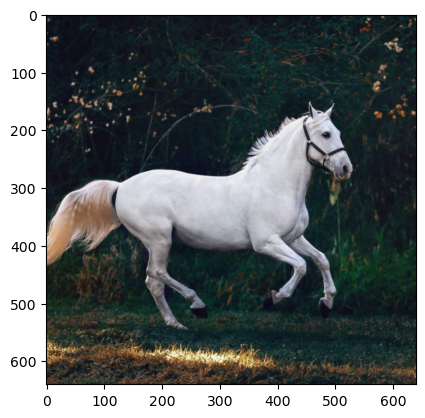

In [11]:
RESIZE_DIM = 640 # low value for faster computation
CROP_DIM = RESIZE_DIM
IMAGENET_MEANS = [0.485, 0.456, 0.406]
IMAGENET_STDS = [0.229, 0.224, 0.225]

transform = torchvision.transforms.Compose([
                torchvision.transforms.Resize(RESIZE_DIM),
                torchvision.transforms.CenterCrop(CROP_DIM),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean = IMAGENET_MEANS,
                                                std = IMAGENET_STDS)])

transformed_images = []
for i in range(len(images_url)):
    img = Image.open(os.path.join(download_directory, f"image{i}.jpg"))
    transformed_images.append(transform(img).unsqueeze(0)) # to add batch dimension for the model

transformed_images = torch.cat(transformed_images, dim = 0) # shape torch.Size([number_of_images, 3, CROP_DIM, CROP_DIM])

plt.imshow((transformed_images[0].permute(1,2,0))* torch.tensor(IMAGENET_STDS) + torch.tensor(IMAGENET_MEANS))
plt.show()
plt.close()

In [12]:
dlab_model.eval()

out = dlab_model(transformed_images.to(device))['out']
print(out.shape) # torch.Size([number_of_images, number of classes = 21, CROP_DIM, CROP_DIM])

torch.Size([4, 21, 640, 640])


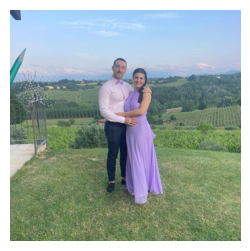

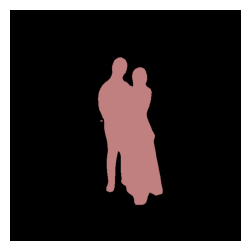

In [13]:
def decode_segmap(image, nc = 21):

    label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)

    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]

    rgb = np.stack([r, g, b], axis = 2)
    return rgb

img_number = 1



plt.figure(figsize = (3, 3))
plt.imshow((transformed_images[img_number].permute(1,2,0))* torch.tensor(IMAGENET_STDS) + torch.tensor(IMAGENET_MEANS))
plt.axis('off')
plt.show()
plt.close()

plt.figure(figsize = (3, 3))
om = torch.argmax(out[img_number].squeeze(), dim = 0).detach().cpu().numpy()
rgb = decode_segmap(om)
plt.imshow(rgb)
plt.axis('off')
plt.show()
plt.close()

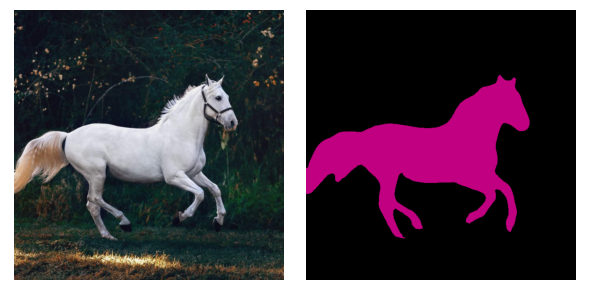

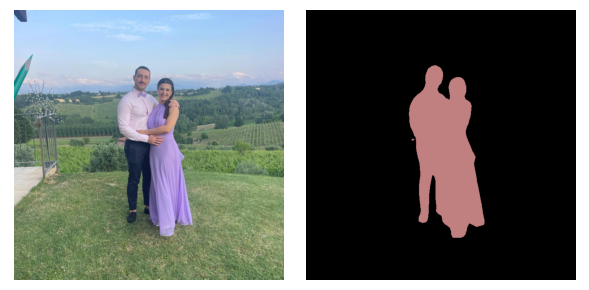

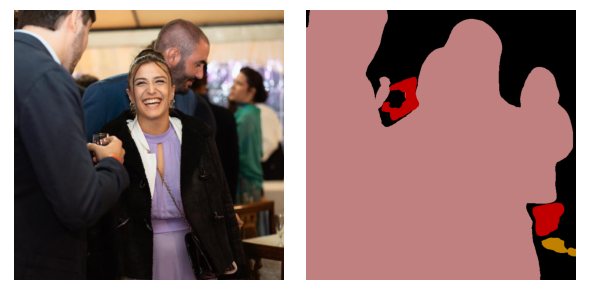

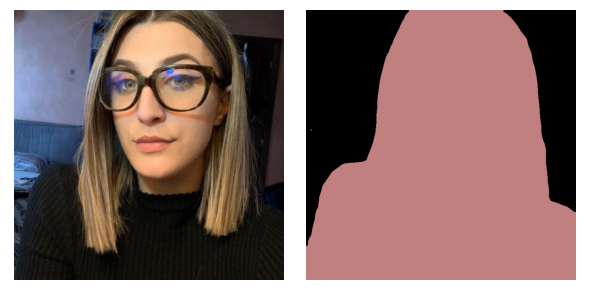

In [14]:
for img_number in range(len(transformed_images)):
    fig = plt.figure(figsize = (6, 3)) # create figure
    plt.axis('off')

    ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
    ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

    ax0.imshow((transformed_images[img_number].permute(1,2,0))* torch.tensor(IMAGENET_STDS) + torch.tensor(IMAGENET_MEANS))
    ax0.axis('off')

    om = torch.argmax(out[img_number].squeeze(), dim = 0).detach().cpu().numpy()
    rgb = decode_segmap(om)
    ax1.imshow(rgb)
    ax1.axis('off')

    plt.tight_layout()
    plt.show()
    plt.close()


# Object Detection

## Theory

In image classification, we assign a single label (e.g. cat, dog, etc.) to the entire image. This is adequate for many tasks where the location of the object you are interested in is not important.
  
  On the other hand, there can be multiple objects in the image, and the application may demand not just identifying the objects, but also locating them in the image.

  For such tasks we need Object Detection. In this category of techniques, the input to the model is an image, and the output is an array of bounding boxes, and a class label for every bounding box.

  The main challenge here is that there might be a varying number of objects in every input image.

  Conceptually, Object Detection sits in between Image Classification and Image Segmentation (every pixel is assigned a class label).
  
  <span style="background-color: yellow">Classification is blazingly fast but the output is just a single class label for the entire image.</span>
  
  <span style="background-color: yellow">Segmentation provides a detailed output - a class label for every pixel -  but is slow.</span>
  
  <span style="background-color: yellow">Object Detection, serves as a happy compromise - fast, and with enough localization accuracy for many tasks.</span>

### Sliding Window Approach

Sliding window is one of the oldest approach in object detection where the input image is split into multiple crops and each crop of the image is classified and if the crop contains a class, then the crop is decided as the bounding box. But this approach is never used in practice as each input image may have 1000s of such crops and each crop passing through the network for classification may take time.

### Region Proposal (RCNN)

Image processing techniques are used to make list of proposed regions in the input image which are then sent through the network for classification. But this is computationally more efficient than sliding window approach as only fewer potential crops which may contain the object is classified by the network.
  
<img src="https://learnopencv.com/wp-content/uploads/2022/10/rcnn-features.png">
Image Source :  [Ross Girshick et al](https://arxiv.org/pdf/1311.2524.pdf)
  
RCNN is better than sliding window, but its still computationally expensive as the network has to classify all the region proposals. It takes around 30-40s for inference of a single image.

### Fast Region Proposal (Fast RCNN)


In fast RCNN, rather than getting region proposals and classifying each region proposals, the input image is sent into the CNN network which gives a feature map of the image. Again some region proposals are used but now we get the region proposals from the feature map of the image and these feature maps are classified. This reduces the computation as some of the CNN layers are common for the whole image.
  
<img src="https://learnopencv.com/wp-content/uploads/2022/10/fast-rcnn-region-proposal.png">
Image Source : [Ross Gishich](https://arxiv.org/pdf/1504.08083.pdf)

### Faster R-CNN

The idea of Faster R-CNN is to use CNNs to propose potential region of interest and the network is called Region Proposal Network. After getting the region proposals , its just like Fast RCNN, we use every regions for classification.
<img src="https://learnopencv.com/wp-content/uploads/2022/10/faster-rcnn-region-proposal.png" width="600">

### Comparison - RCNN, Fast RCNN & Faster RCNN



| Feature                  | RCNN                                    | Fast RCNN                         | Faster RCNN                        |
|--------------------------|----------------------------------------|-----------------------------------|-------------------------------------|
| **Year**                 | 2014                                   | 2015                              | 2015                                |
| **Region Proposal Method** | Selective Search                      | Selective Search                  | Region Proposal Network (RPN)      |
| **CNN Processing**       | Separate CNN per region (~2,000 times) | Single CNN for entire image       | Single CNN for entire image        |
| **Speed**               | Very slow (40-50 sec/image)            | Faster (~2 sec/image)             | Fastest (~0.2 sec/image)           |
| **Accuracy**            | Good                                   | Better                            | Best                               |
| **End-to-End Trainable?** | No                                     | Yes                               | Yes                                |
| **Main Drawback**       | Too slow                               | Still uses Selective Search       | High computation for large images  |

## Model 

The pretrained Faster-RCNN ResNet-50 model we are going to use expects the input image tensor to be in the form ```[n, c, h, w]```
where
- n is the number of images
- c is the number of channels , for RGB images its 3
- h is the height of the image
- w is the widht of the image

The model will return
- Bounding boxes [x0, y0, x1, y1]  all all predicted classes of shape (N,4) where N is the number of classes predicted by the model to be present in the image.
- Labels of all predicted classes.
- Scores of each predicted label.

In [15]:
if device.type != "cuda":
    device = torch.device("cpu")


model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
    weights=torchvision.models.detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT
).to(device)

model.eval()

1+1

2

In [16]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

COLORS = np.random.uniform(0, 255, size = (len(COCO_INSTANCE_CATEGORY_NAMES), 3))

In [17]:
def get_prediction(img_path, threshold):
    """
    Perform a forward pass through the model to make predictions.

    Parameters:
        img_path (str): Path to the input image.
        threshold (float): Minimum confidence score for filtering predictions.

    Returns:
        pred_boxes (list of tuples): Bounding box coordinates [(x1, y1), (x2, y2)].
        pred_class (list of str): Predicted class names for each bounding box.
    """

    # Open the image using PIL
    img = Image.open(img_path)

    # Convert the image to a PyTorch tensor
    transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
    img = transform(img)

    # Perform inference (forward pass)
    pred = model([img])

    # Extract predictions and detach them from the computation graph
    pred_data = pred[0]

    # Convert tensors to NumPy arrays
    labels = pred_data['labels'].detach().cpu().numpy()
    boxes = pred_data['boxes'].detach().cpu().numpy()
    scores = pred_data['scores'].detach().cpu().numpy()

    # Filter predictions based on threshold
    valid_indices = scores > threshold

    # Keep only valid bounding boxes and class labels
    pred_boxes = [((b[0], b[1]), (b[2], b[3])) for b in boxes[valid_indices]]
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in labels[valid_indices]]

    return pred_boxes, pred_class

def object_detection_api(
    img_number,
    threshold=0.5,
    size = (2,2)
):
    img_path = os.path.join(download_directory, f"image{img_number}.jpg")
    """
    Annotates the image with bounding boxes and class names.
    It calls the `get_prediction` function as well.
    parameters:
        img_path: path of the input image
        threshold: threshold value for prediction score
    method:
      - prediction is obtained from get_prediction method
      - for each prediction, bounding box is drawn and text is written
        with opencv
      - the final image is displayed
    """

    # Get predictions (bounding boxes and class labels) for the image
    boxes, pred_cls = get_prediction(img_path, threshold)

    # Read image using OpenCV
    img = cv2.imread(img_path)
    # Convert from OpenCV's default BGR format to RGB for correct visualization
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Calculate thickness for drawing bounding boxes based on image size
    rect_th = max(round(sum(img.shape) / 2 * 0.003), 2)
    # Calculate thickness for the text annotations
    text_th = max(rect_th - 1, 1)

    # Iterate through each detected object
    for i in range(len(boxes)):
        # Extract bounding box coordinates from the prediction output
        p1, p2 = (int(boxes[i][0][0]), int(boxes[i][0][1])), (int(boxes[i][1][0]), int(boxes[i][1][1]))

        # Get color corresponding to the predicted class from a predefined color list
        color = COLORS[COCO_INSTANCE_CATEGORY_NAMES.index(pred_cls[i])]

        # Draw bounding box around the detected object
        cv2.rectangle(
            img,
            p1,  # Top-left corner
            p2,  # Bottom-right corner
            color=color,  # Bounding box color
            thickness=rect_th  # Line thickness
        )

        # Get the size (width and height) of the text to be displayed
        w, h = cv2.getTextSize(
            pred_cls[i],  # Object class name
            0,  # Font face
            fontScale=rect_th / 3,  # Scale font relative to box thickness
            thickness=text_th  # Text thickness
        )[0]  # Extract width and height

        # Determine if text label should be placed inside or outside the bounding box
        outside = p1[1] - h >= 3  # Check if there is enough space to put text above the box
        # Calculate coordinates for the background rectangle that holds the text
        p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3

        # Draw a filled rectangle for the class label background
        cv2.rectangle(
            img,
            p1,  # Top-left corner
            p2,  # Bottom-right corner
            color=color,  # Same as bounding box color
            thickness=-1,  # Filled rectangle
            lineType=cv2.LINE_AA  # Anti-aliased lines for smoother edges
        )

        # Overlay the text label on top of the filled rectangle
        cv2.putText(
            img,
            pred_cls[i],  # Class name
            (p1[0], p1[1] - 5 if outside else p1[1] + h + 2),  # Adjust text position
            cv2.FONT_HERSHEY_SIMPLEX,  # Font type
            rect_th / 3,  # Scale font size
            (255, 255, 255),  # White text color
            thickness=text_th + 1  # Text thickness
        )

    # Create a figure for displaying the image
    plt.figure(figsize=size)
    # Display the image with bounding boxes and labels
    plt.imshow(img)
    # Remove x-axis ticks for a cleaner visualization
    plt.xticks([])
    # Remove y-axis ticks for a cleaner visualization
    plt.yticks([])
    # Show the final output image
    plt.show()


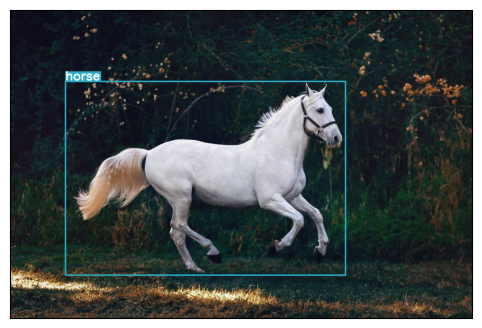

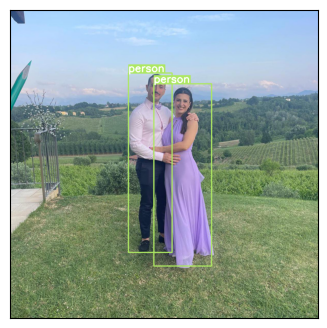

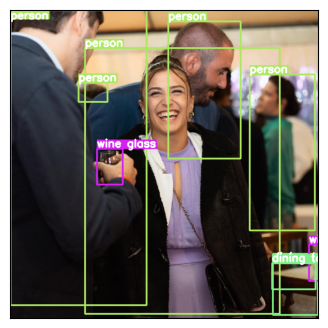

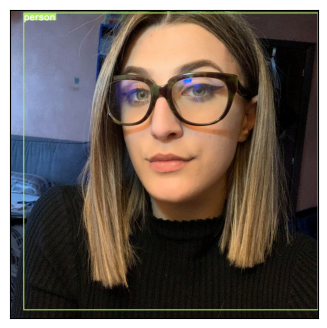

In [18]:
for img_number in range(len(images_url)):
    object_detection_api(img_number, threshold = 0.8, size = (8, 4))

# YOLO

More info [here](https://learnopencv.com/mastering-all-yolo-models/).

In [19]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/alex/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [35]:
def prediction(model_type, img_number, display_result = False, task : str = None):
    img_path = os.path.join(download_directory, f"image{img_number}.jpg")
    model = YOLO(model_type)
    result = model(img_path, save = True, conf=0.5)

    for r in result:
       
        filename = os.path.basename(img_path)
        pred_img_path = os.path.join(r.save_dir, filename)

        pred = cv2.cvtColor(cv2.imread(pred_img_path), cv2.COLOR_BGR2RGB)
        plt.imshow(pred)
        plt.axis('off')
        plt.title(f"YOLO11 - {task}")
    plt.show()
    plt.close()

    if display_result:
       print(result)


image 1/1 /Users/alex/Desktop/programmazione/notebooks/My notebooks/OpenCV tutorials/Computer Vision Tasks/Images/image1.jpg: 640x640 2 persons, 457.2ms
Speed: 3.4ms preprocess, 457.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict13


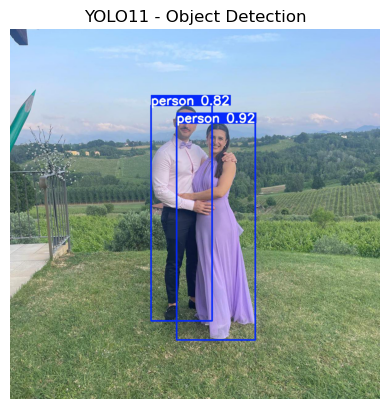

In [36]:
img_number = 1
model_type = "yolo11l.pt"

prediction(model_type, img_number, task = "Object Detection")


image 1/1 /Users/alex/Desktop/programmazione/notebooks/My notebooks/OpenCV tutorials/Computer Vision Tasks/Images/image1.jpg: 640x640 2 persons, 499.8ms
Speed: 3.0ms preprocess, 499.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict14


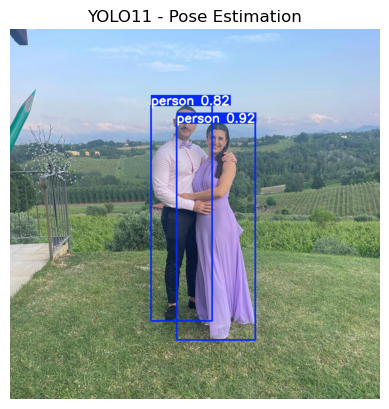

In [37]:
img_number = 1
model_type = "yolo11l.pt"

prediction(model_type, img_number, task = "Pose Estimation")


image 1/1 /Users/alex/Desktop/programmazione/notebooks/My notebooks/OpenCV tutorials/Computer Vision Tasks/Images/image2.jpg: 640x640 5 persons, 1 wine glass, 467.0ms
Speed: 3.2ms preprocess, 467.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict15


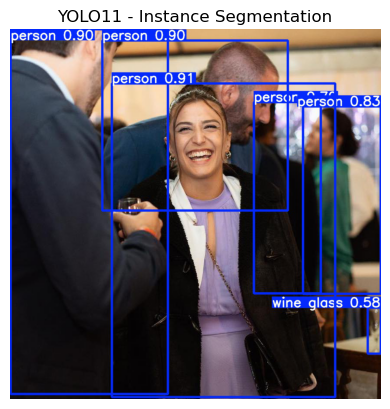

In [38]:
img_number = 2
model_type = "yolo11l.pt"

prediction(model_type, img_number, task = "Instance Segmentation", display_result = False)


image 1/1 /Users/alex/Desktop/programmazione/notebooks/My notebooks/OpenCV tutorials/Computer Vision Tasks/Images/image2.jpg: 640x640 5 persons, 1 wine glass, 434.8ms
Speed: 3.2ms preprocess, 434.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict16


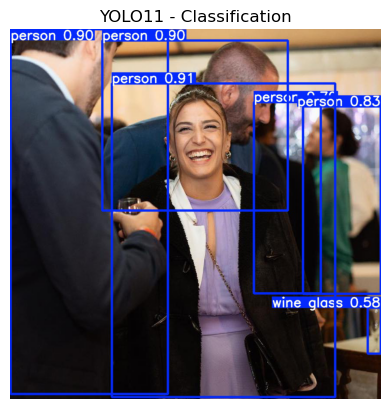

In [39]:
img_number = 2
model_type = "yolo11l.pt"

prediction(model_type, img_number, task = "Classification")


image 1/1 /Users/alex/Desktop/programmazione/notebooks/My notebooks/OpenCV tutorials/Computer Vision Tasks/Images/image0.jpg: 448x640 1 horse, 304.1ms
Speed: 2.4ms preprocess, 304.1ms inference, 2.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict17


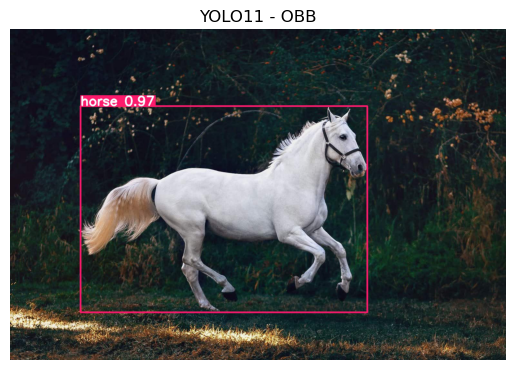

In [40]:
img_number = 0
model_type = "yolo11l.pt"

prediction(model_type, img_number, task = "OBB")